<a href="https://colab.research.google.com/github/SadiyaMayat/Image-Segmentation/blob/main/Imageseg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgb2hsv, label2rgb
from skimage import data
from skimage.filters import gaussian, threshold_otsu, threshold_niblack, threshold_sauvola
from skimage.segmentation import active_contour, chan_vese, slic, felzenszwalb, mark_boundaries, watershed
from skimage.feature import canny
from scipy import ndimage as ndi
from sklearn.cluster import KMeans

In [2]:
# Load the "astronaut" image from skimage data module
astronaut = data.astronaut()

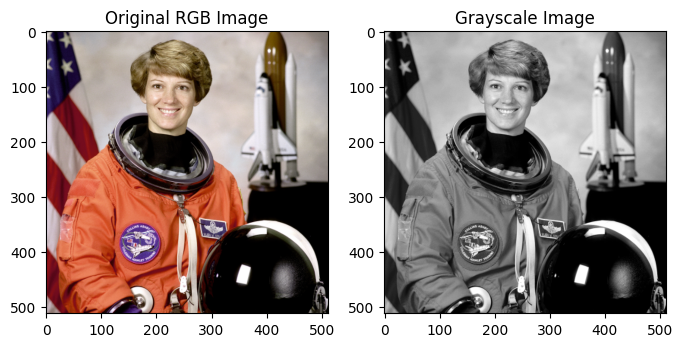

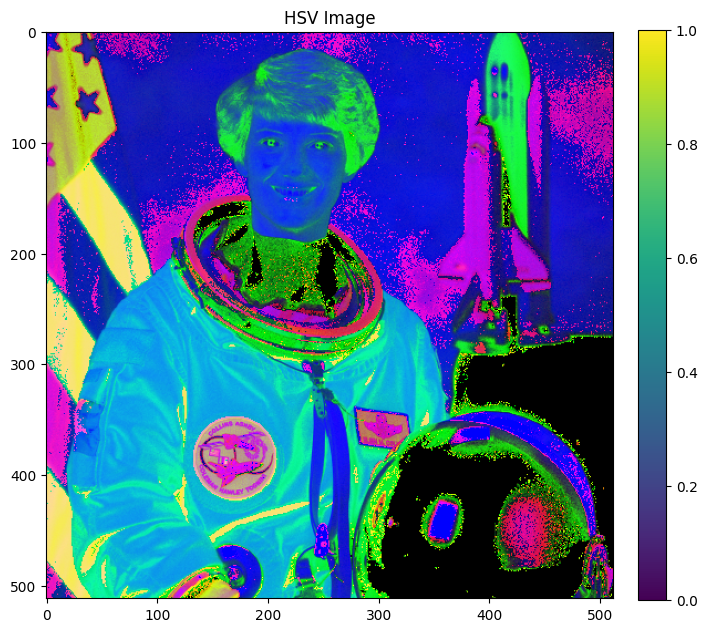

In [4]:
# Color Space Conversion
# Convert RGB to Grayscale
gray_astronaut = rgb2gray(astronaut)

# Convert RGB to HSV
hsv_astronaut = rgb2hsv(astronaut)

# Displaying the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(astronaut)
plt.title('Original RGB Image')

# Display Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_astronaut, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Display HSV image
plt.figure(figsize=(8, 8))
plt.imshow(hsv_astronaut)
plt.title('HSV Image')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

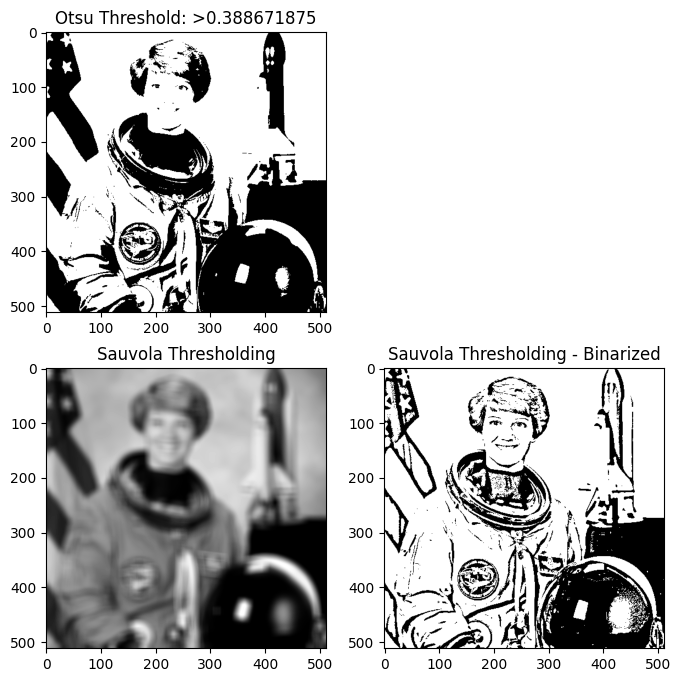

In [5]:
# Thresholding

# Otsu's Thresholding
plt.figure(figsize=(8, 8))
threshold = threshold_otsu(gray_astronaut)
binarized_astronaut = (gray_astronaut > threshold) * 1
plt.subplot(2, 2, 1)
plt.title("Otsu Threshold: >" + str(threshold))
plt.imshow(binarized_astronaut, cmap="gray")

# Sauvola's Thresholding
threshold = threshold_sauvola(gray_astronaut)
plt.subplot(2, 2, 3)
plt.title("Sauvola Thresholding")
plt.imshow(threshold, cmap="gray")

# Sauvola's Thresholding - Binarized
binarized_astronaut = (gray_astronaut > threshold) * 1
plt.subplot(2, 2, 4)
plt.title("Sauvola Thresholding - Binarized")
plt.imshow(binarized_astronaut, cmap="gray")
plt.show()

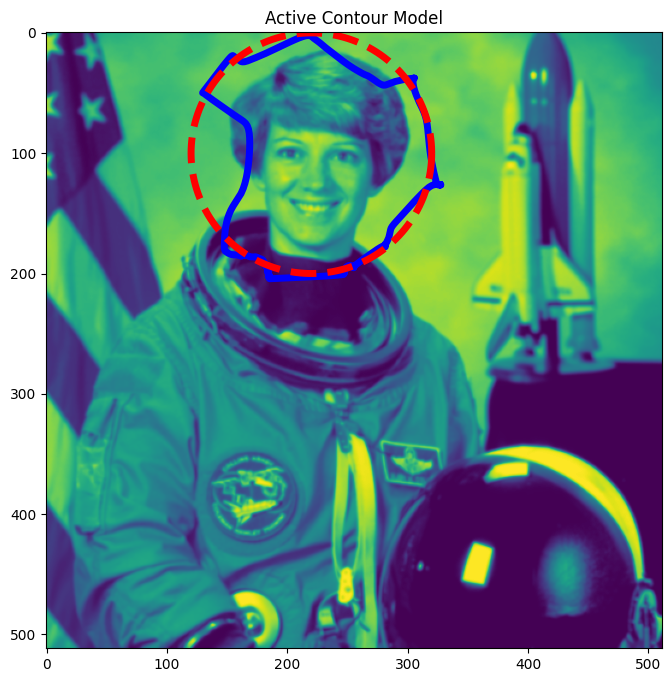

<ipython-input-6-323a85c6b754>:20: FutureWarning: `max_iter` is a deprecated argument name for `chan_vese`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  chanvese_gray_astronaut = chan_vese(gray_astronaut, max_iter=100, extended_output=True)


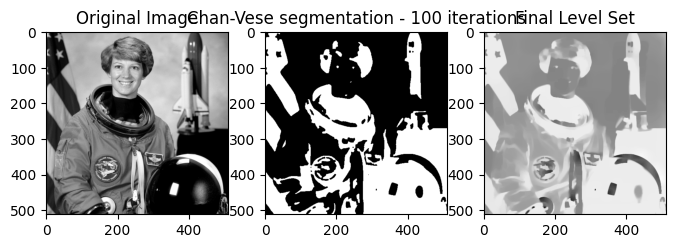

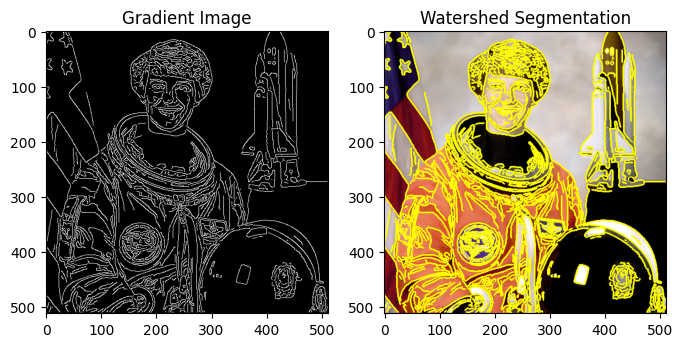

In [6]:
# Region-Based Segmentation

# Active Contour Model
gray_astronaut_noiseless = gaussian(gray_astronaut, 1)
x1 = 220 + 100 * np.cos(np.linspace(0, 2 * np.pi, 500))
x2 = 100 + 100 * np.sin(np.linspace(0, 2 * np.pi, 500))
snake = np.array([x1, x2]).T
astronaut_snake = active_contour(gray_astronaut_noiseless, snake)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(gray_astronaut_noiseless)
ax.plot(astronaut_snake[:, 0], astronaut_snake[:, 1], '-b', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)
plt.title('Active Contour Model')
plt.show()

# Chan-Vese Segmentation
fig, axes = plt.subplots(1, 3, figsize=(8, 8))
chanvese_gray_astronaut = chan_vese(gray_astronaut, max_iter=100, extended_output=True)
ax = axes.flatten()
ax[0].imshow(gray_astronaut, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(chanvese_gray_astronaut[0], cmap="gray")
ax[1].set_title("Chan-Vese segmentation - 100 iterations")
ax[2].imshow(chanvese_gray_astronaut[1], cmap="gray")
ax[2].set_title("Final Level Set")
plt.show()

# Watershed Segmentation
gradient = canny(gray_astronaut)
markers = ndi.label(gradient)[0]
labels = watershed(gradient, markers)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient Image')
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(astronaut, labels))
plt.title('Watershed Segmentation')
plt.show()


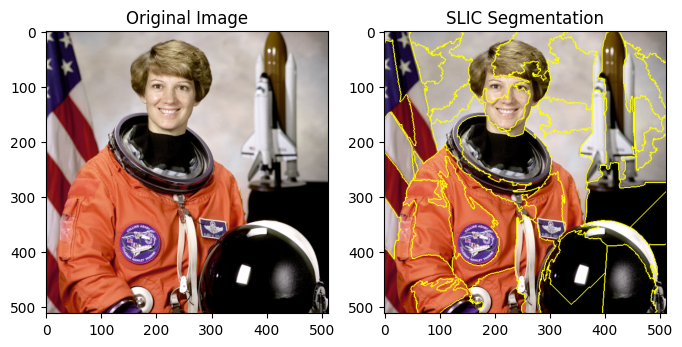

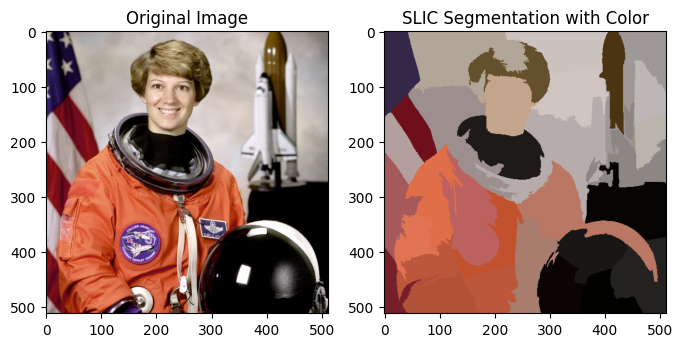

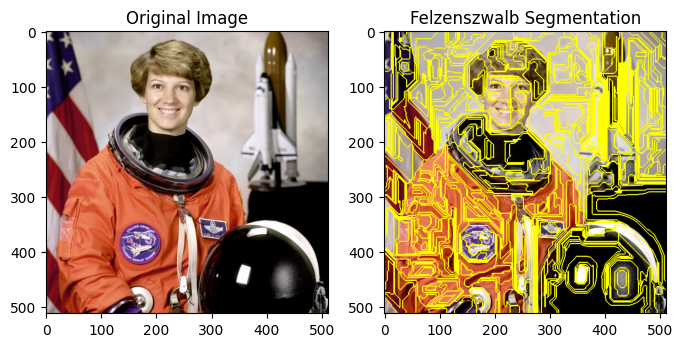

In [7]:
# Superpixel Segmentation

# SLIC Segmentation with Boundaries
plt.figure(figsize=(8, 8))
astronaut_segments = slic(astronaut, n_segments=100, compactness=1)
plt.subplot(1, 2, 1)
plt.imshow(astronaut)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(astronaut, astronaut_segments))
plt.title('SLIC Segmentation')
plt.show()

# Enhanced Visualization of SLIC Segments
plt.figure(figsize=(8, 8))
astronaut_segments = slic(astronaut, n_segments=50, compactness=10)
plt.subplot(1, 2, 1)
plt.imshow(astronaut)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(label2rgb(astronaut_segments, astronaut, kind='avg'))
plt.title('SLIC Segmentation with Color')
plt.show()

# Felzenszwalb Segmentation
plt.figure(figsize=(8, 8))
astronaut_segments = felzenszwalb(astronaut, scale=2, sigma=5, min_size=100)
plt.subplot(1, 2, 1)
plt.imshow(astronaut)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(astronaut, astronaut_segments))
plt.title('Felzenszwalb Segmentation')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


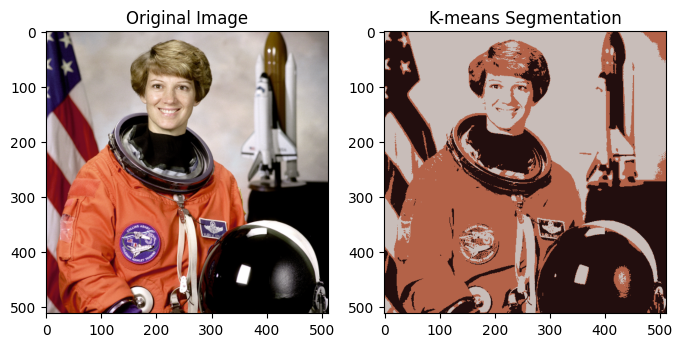

In [8]:
# Clustering-Based Segmentation

# K-means Clustering
pixel_values = astronaut.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pixel_values)

segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(astronaut.shape)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(astronaut)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(segmented_img.astype(np.uint8))
plt.title('K-means Segmentation')
plt.show()